In [22]:
# Re-import necessary libraries after code execution state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import defaultdict
import os

import os
cwd = os.getcwd()  
import importlib
print(cwd)  #the last part should be .../py-graspi/tests

def extract_numbers(filename):
    """Extract numbers from a filename for sorting and size extraction."""
    return tuple(map(int, re.findall(r'\d+', filename)))


def group_files_by_pattern(files):
    """Group file names by replacing numeric values with a placeholder (#)."""
    pattern_groups = defaultdict(list)
    for file in files:
        pattern = re.sub(r'\d+(?:\.\d+)?', '#', file)
        pattern_groups[pattern].append(file)
    return pattern_groups


# Re-import libraries after code state reset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import defaultdict
import os

def group_files_by_pattern(files):
    """Group file names by replacing numeric values with a placeholder (#)."""
    pattern_groups = defaultdict(list)
    for file in files:
        pattern = re.sub(r'\d+(?:\.\d+)?', '#', file)
        pattern_groups[pattern].append(file)
    return pattern_groups


def plot_execution_and_memory_pixel_count_cleaned(csv_file):
    """
    Plot execution time and memory usage by input morphology size (in pixels),
    with x-axis as total pixel count (int), cleanly labeled and evenly spaced.
    """
    df = pd.read_csv(csv_file)
    df['total_execution_time'] = df['descriptor_time'] + df['graph_time']
    df['peak_memory_usage_gb'] = df[['graph_mem', 'descriptor_mem']].max(axis=1) / 1e9

    # Extract size, compute pixel count
    df['size'] = df['Test File'].str.extract(r'(\d+)').astype(int)
    df['pixel_count'] = (df['size'] ** 2).astype(int)

    pattern_groups = group_files_by_pattern(df['Test File'])

    for pattern, files in pattern_groups.items():
        subset = df[df['Test File'].isin(files)].copy()
        subset.sort_values('pixel_count', inplace=True)

        x_values = subset['pixel_count']
        x_labels = [str(x) for x in x_values]

        plt.figure(figsize=(12, 10))

        # Execution time plot
        ax1 = plt.subplot(2, 1, 1)
        ax1.plot(x_labels, subset['total_execution_time'], marker='o', linestyle='-', color='blue')
        ax1.set_xlabel('Total Pixel Count (e.g., 10x10 → 100)')
        ax1.set_ylabel('Time (s)')
        ax1.set_title(f'Total Execution Time')
        ax1.grid(True)

        # Memory usage plot
        ax2 = plt.subplot(2, 1, 2)
        ax2.plot(x_labels, subset['peak_memory_usage_gb'], marker='s', linestyle='-', color='green')
        ax2.set_xlabel('Total Pixel Count (e.g., 10x10 → 100)')
        ax2.set_ylabel('Memory Usage (GB)')
        ax2.set_title(f'Peak Memory Usage')
        ax2.grid(True)

        plt.tight_layout(pad=2.0)
        plt.show()

/Users/hwi/Develop/ClassSrc/CSE302/py-graspi/tests


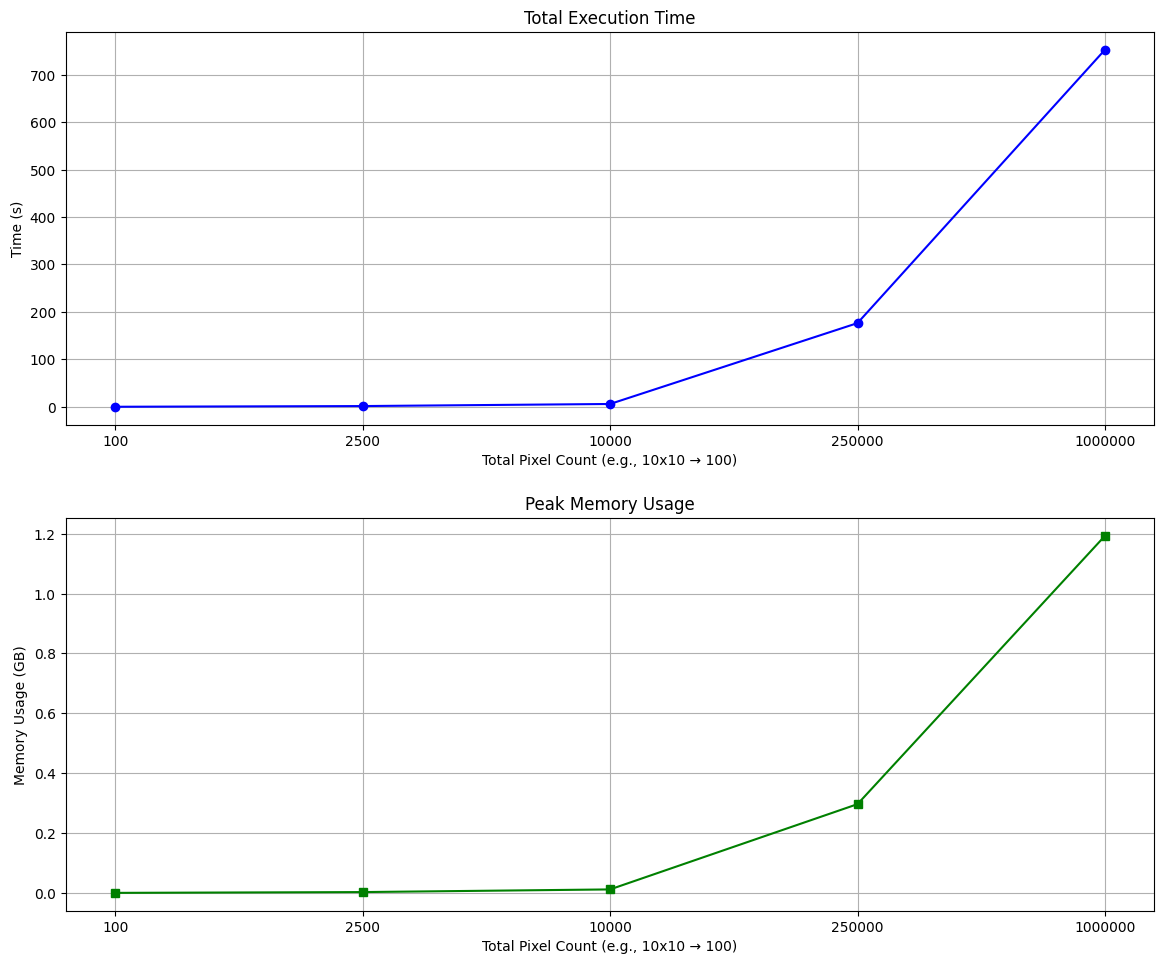

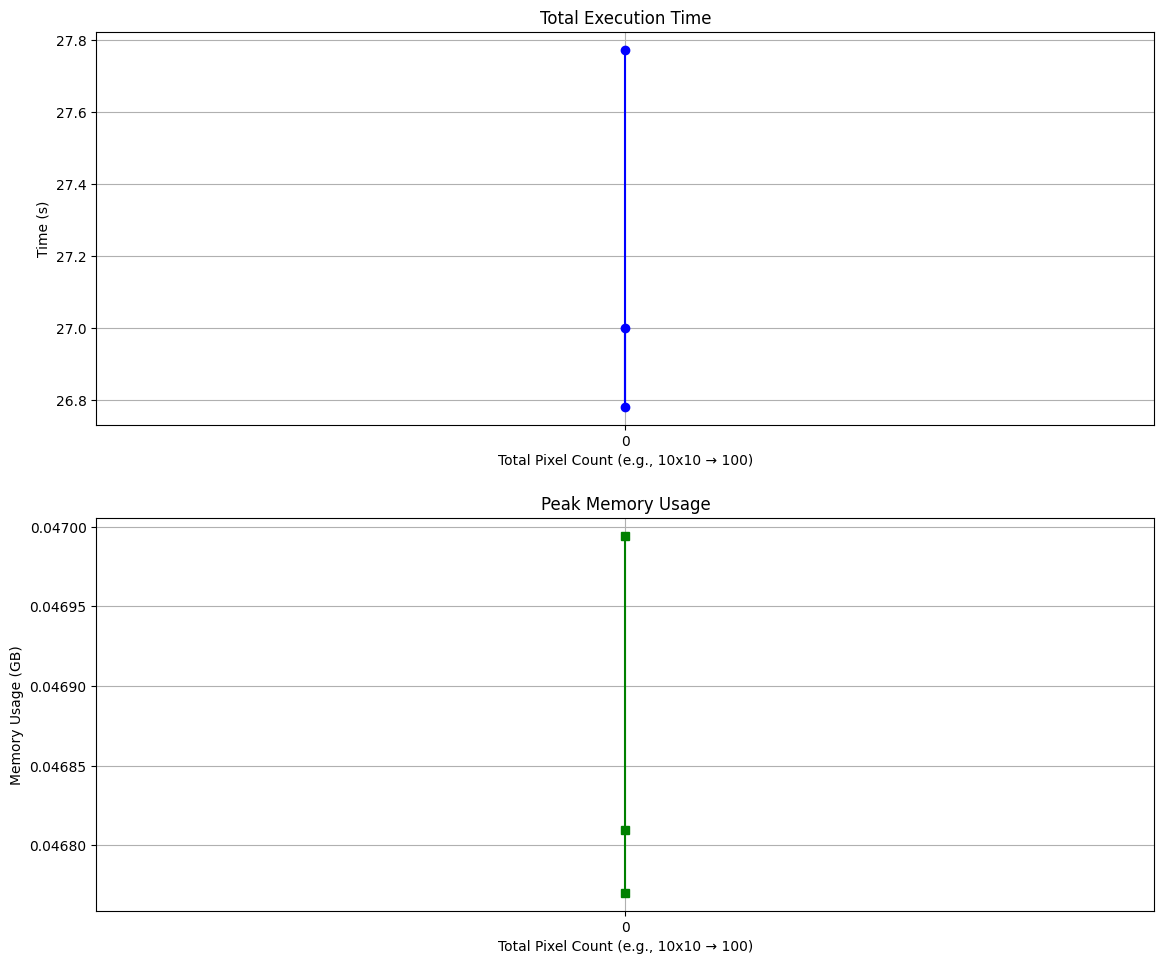

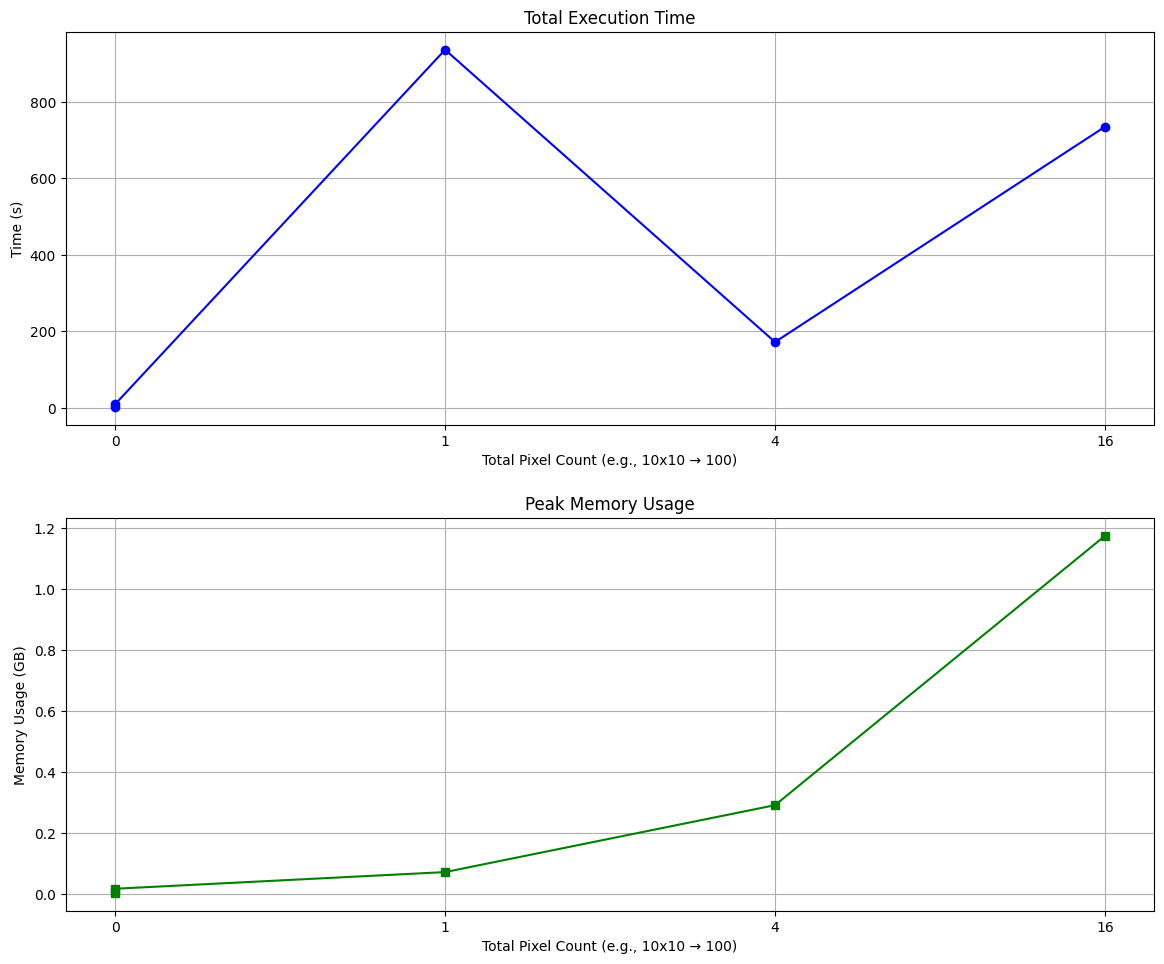

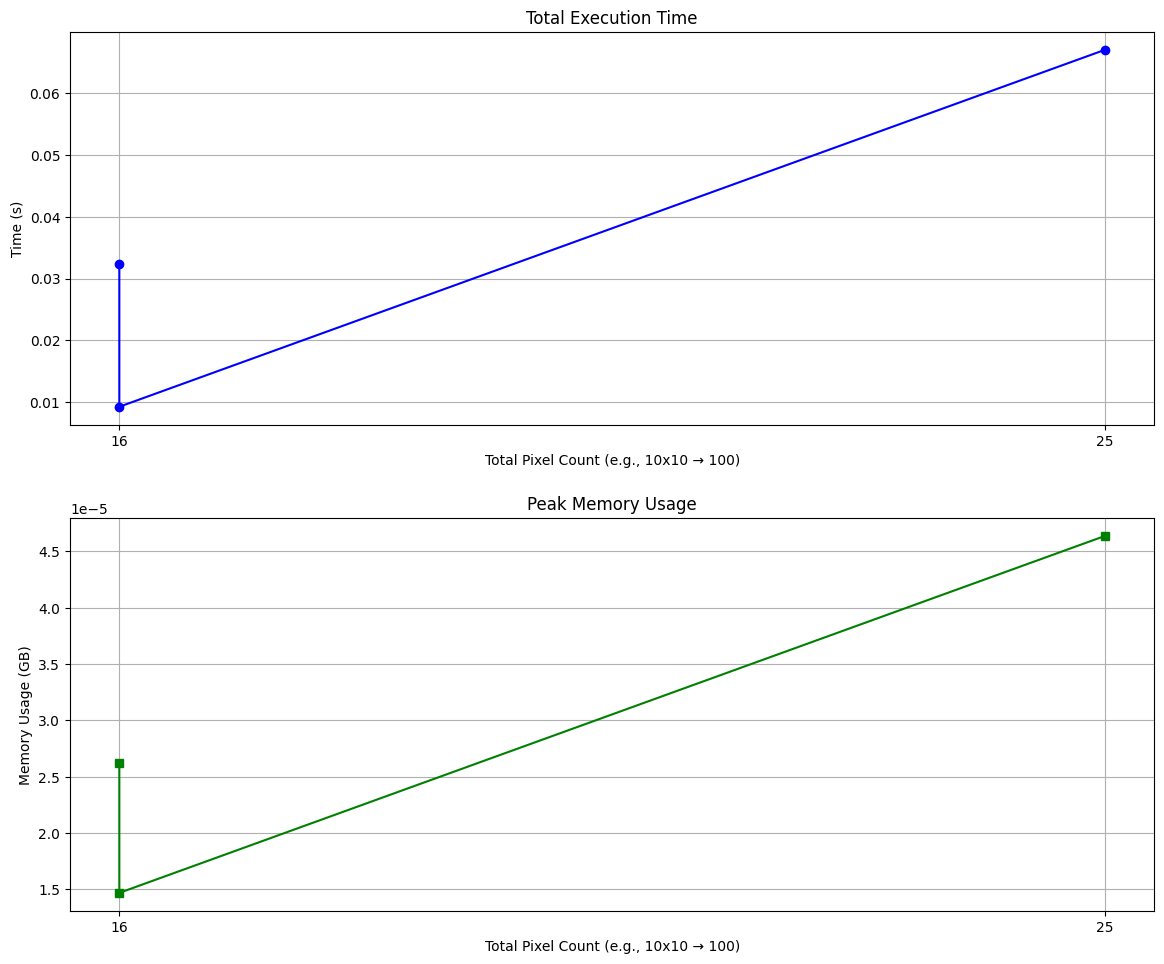

In [23]:
plot_execution_and_memory_pixel_count_cleaned(cwd+"/performance/stats_main_igraph.csv")